<a href="https://colab.research.google.com/github/DamarisMaldonado/IA_IB_2024/blob/main/PIA_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Final Proyect**

Roxana Pamela Martínez Córdova 2125128

Jorge Jose Hernandez Garza 2109528

Damaris Marlen Maldonado Lozano 2002610

Tamara Ramirez Alejandre 2109492

In [ ]:
import os
import zipfile
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Ruta donde se encuentra el archivo descargado desde Kaggle
zip_file = '/content/brain_tumor_dataset.zip'

# Directorio de extracción
extract_dir = '/content/Dataset'

# Extraer el archivo zip
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Carpeta donde se encuentran las imágenes
dataset_dir = os.path.join(extract_dir, 'brain_tumor_dataset')

FileNotFoundError: [Errno 2] No such file or directory: '/content/brain_tumor_dataset.zip'

In [9]:
from google.colab import files
uploaded = files.upload() # This will prompt you to upload the file

# Ruta donde se encuentra el archivo descargado desde Kaggle
# zip_file = '/content/brain_tumor_dataset.zip' # This line is replaced with the following:
zip_file = list(uploaded.keys())[0]  # Get the name of the uploaded file

# Directorio de extracción
extract_dir = '/content/Dataset'

# Extraer el archivo zip
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Carpeta donde se encuentran las imágenes
dataset_dir = os.path.join(extract_dir, 'brain_tumor_dataset')

Saving brain_tumor_dataset.zip to brain_tumor_dataset.zip


In [10]:
# Función para cargar las imágenes y etiquetas desde el dataset
def cargar_datos(dataset_dir):
    imagenes = []
    etiquetas = []
    for label in ['no', 'yes']:
        folder_path = os.path.join(dataset_dir, label)
        for filename in os.listdir(folder_path):
            image_path = os.path.join(folder_path, filename)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Cargar la imagen en escala de grises
            image = cv2.resize(image, (128, 128))  # Redimensionar todas las imágenes a 128x128 píxeles
            imagenes.append(image)
            etiquetas.append(0 if label == 'no' else 1)

    return np.array(imagenes), np.array(etiquetas)

# Cargar imágenes y etiquetas
imagenes, etiquetas = cargar_datos(dataset_dir)

# Convertir etiquetas a formato categórico
etiquetas_categoricas = to_categorical(etiquetas)

In [11]:
# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(imagenes, etiquetas_categoricas, test_size=0.2, random_state=42)

# Normalizar los datos de las imágenes
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Asegurarse de que las dimensiones de las imágenes sean adecuadas para TensorFlow (N, height, width, channels)
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

In [12]:
# Verificar las dimensiones de los conjuntos de datos
print(f'Dimensiones de X_train: {X_train.shape}')
print(f'Dimensiones de X_test: {X_test.shape}')
print(f'Dimensiones de y_train: {y_train.shape}')
print(f'Dimensiones de y_test: {y_test.shape}')

Dimensiones de X_train: (202, 128, 128, 1)
Dimensiones de X_test: (51, 128, 128, 1)
Dimensiones de y_train: (202, 2)
Dimensiones de y_test: (51, 2)


In [13]:
# Definir el modelo CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,322 (12.60 MB)

 Trainable params: 3,304,322 (12.60 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.5632 - loss: 0.7747 - val_accuracy: 0.7647 - val_loss: 0.6379
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.6909 - loss: 0.6131 - val_accuracy: 0.7255 - val_loss: 0.5644
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 868ms/step - accuracy: 0.7472 - loss: 0.5303 - val_accuracy: 0.8039 - val_loss: 0.5293
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.7463 - loss: 0.5258 - val_accuracy: 0.7647 - val_loss: 0.4946
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8011 - loss: 0.4681 - val_accuracy: 0.8039 - val_loss: 0.4930
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 864ms/step - accuracy: 0.7356 - loss: 0.5091 - val_accuracy: 0.7843 - val_loss: 0.4679
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 858ms/step - accuracy: 0.8435 - loss: 0.4258 - val_accuracy: 0.8235 - val_loss: 0.4606
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.8032 - loss: 0.4279 - val_accuracy: 0.8235 - val_loss: 0.4455
Epo

In [15]:
# Evaluar el modelo con los datos de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Pérdida en los datos de prueba: {loss:.4f}')
print(f'Exactitud en los datos de prueba: {accuracy:.4f}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 0.7833 - loss: 0.4906
Pérdida en los datos de prueba: 0.4627
Exactitud en los datos de prueba: 0.7843


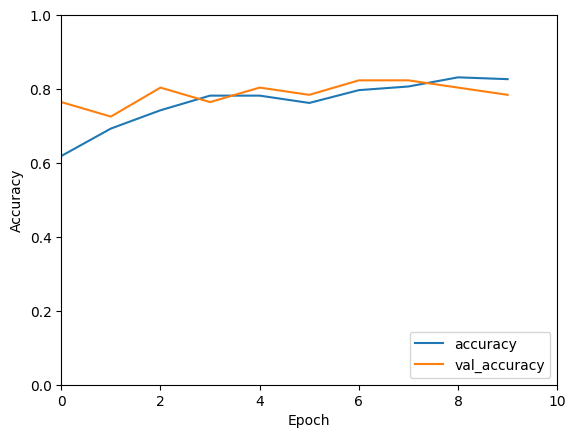

In [16]:
# Plot with the difference in accuracy values from training and validation.
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.xlim([0, 10])
plt.legend(loc='lower right')
plt.show()

In [17]:
# Predicciones
predictions = model.predict(X_test)

# Definir nombres de las clases
class_names = ['No Tumor', 'Tumor']

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 290ms/step


In [19]:
# Funciones de visualización
def plot_image(i, predictions_array, true_label, img):
    true_label, img = np.argmax(true_label[i]), img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img.squeeze(), cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                  100*np.max(predictions_array),
                                  class_names[true_label]),
                                  color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = np.argmax(true_label[i])
    plt.grid(False)
    plt.xticks(range(2))
    plt.yticks([])
    thisplot = plt.bar(range(2), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

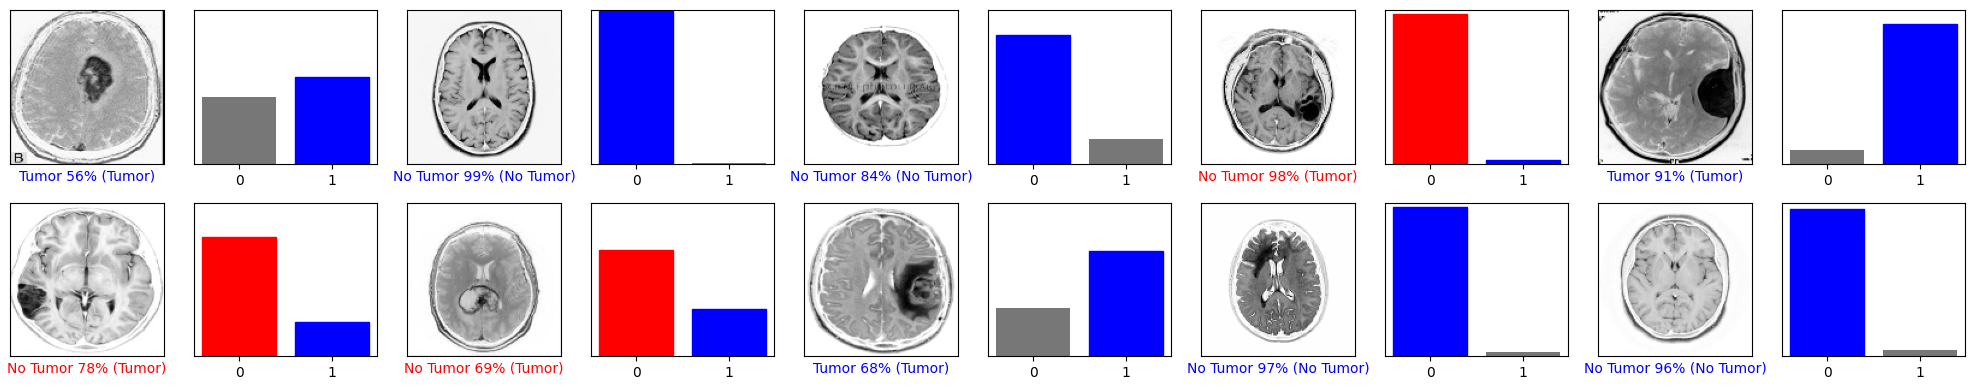

In [20]:

# Visualizar las predicciones
num_rows = 2
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()